In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,8

In [2]:
dataset = pd.read_csv("E:\\IIT Kanpur\\Placements\\Projects\\SBI Stock price prediction\\SBIN.NS.csv")
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/17/2015,272.399994,274.000000,270.500000,271.100006,265.187134,5571891
1,7/20/2015,272.000000,272.000000,266.149994,267.450012,261.616760,6418930
2,7/21/2015,267.000000,269.799988,263.500000,264.299988,258.535431,5638653
3,7/22/2015,263.700012,269.399994,261.899994,268.549988,262.692749,11322177
4,7/23/2015,268.500000,272.000000,267.250000,270.049988,264.160034,6376216


In [3]:
# Parse strings to ddataframe type
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
Dset = dataset.set_index(['Date'])

In [4]:
Dset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-17,272.399994,274.000000,270.500000,271.100006,265.187134,5571891
2015-07-20,272.000000,272.000000,266.149994,267.450012,261.616760,6418930
2015-07-21,267.000000,269.799988,263.500000,264.299988,258.535431,5638653
2015-07-22,263.700012,269.399994,261.899994,268.549988,262.692749,11322177
2015-07-23,268.500000,272.000000,267.250000,270.049988,264.160034,6376216


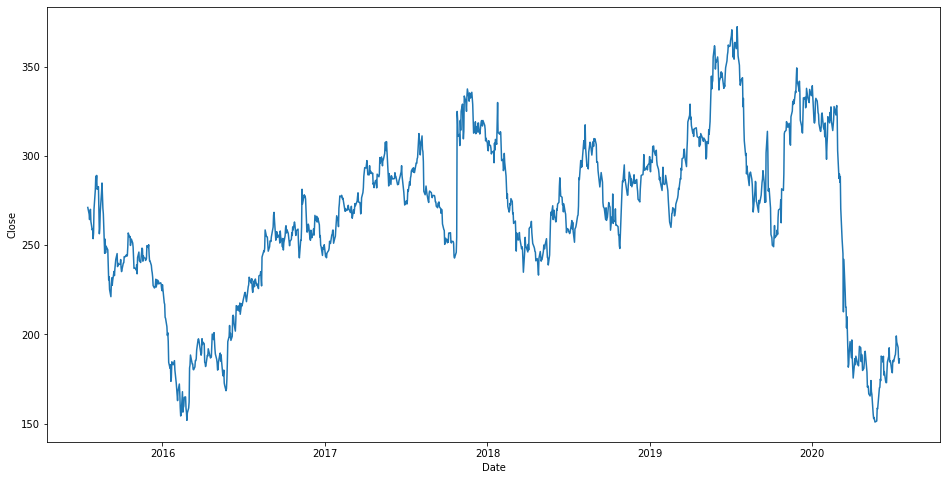

In [5]:
DS = Dset['Close']
## plot graph
plt.xlabel("Date")
plt.ylabel('Close')
plt.plot(DS)

In [6]:
# Determine rolling statistics
rolmean = DS.rolling(window = 245).mean()

rolstd = DS.rolling(window = 245).std()
print(rolmean, rolstd)

Date
2015-07-17           NaN
2015-07-20           NaN
2015-07-21           NaN
2015-07-22           NaN
2015-07-23           NaN
                 ...    
2020-07-10    266.932653
2020-07-13    266.273470
2020-07-14    265.550408
2020-07-15    264.816531
2020-07-16    264.107143
Name: Close, Length: 1228, dtype: float64 Date
2015-07-17          NaN
2015-07-20          NaN
2015-07-21          NaN
2015-07-22          NaN
2015-07-23          NaN
                ...    
2020-07-10    64.699879
2020-07-13    64.629797
2020-07-14    64.531843
2020-07-15    64.434520
2020-07-16    64.338405
Name: Close, Length: 1228, dtype: float64


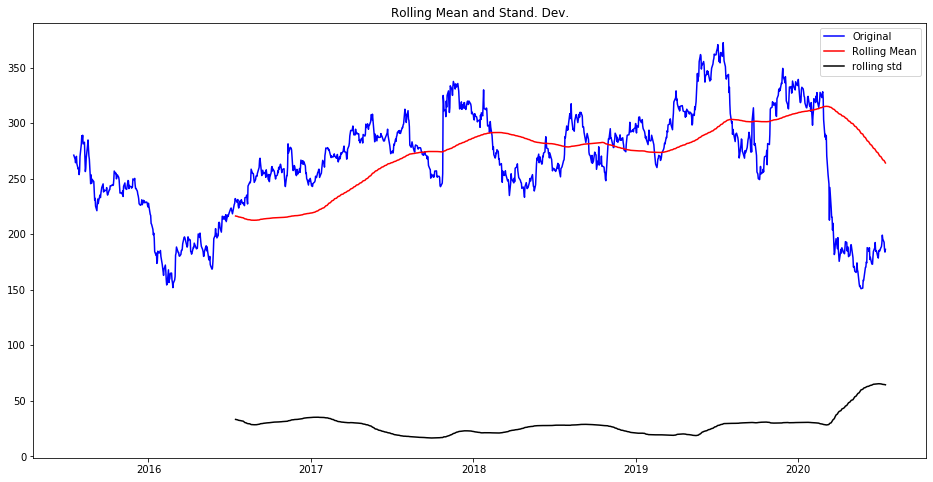

In [7]:
#plot rolling statistics:
orig = plt.plot(DS, color='blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Stand. Dev.')
plt.show(block = False)

In [8]:
# Dickey Fuller test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey Fuller test')
dftest = adfuller(DS, autolag = 'AIC') # Akaike Information Criterion

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of observation Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    
print(dfoutput)

Results of Dickey Fuller test
Test Statistic                  -2.059138
p-value                          0.261259
#Lags Used                       7.000000
Number of observation Used    1220.000000
Critical Value (1%)             -3.435721
Critical Value (5%)             -2.863912
Critical Value (10%)            -2.568033
dtype: float64


Cannot reject H0, data is not stationary

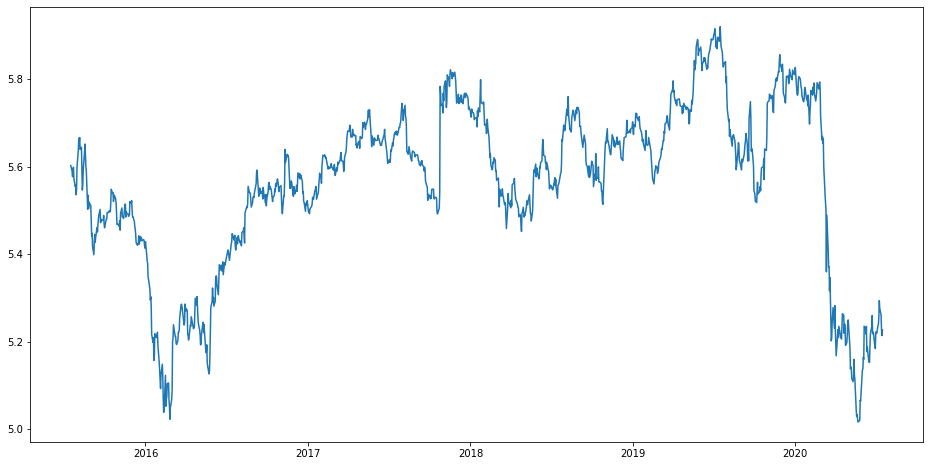

In [9]:
# Estimating trend
DS_log = np.log(DS)
plt.plot(DS_log)

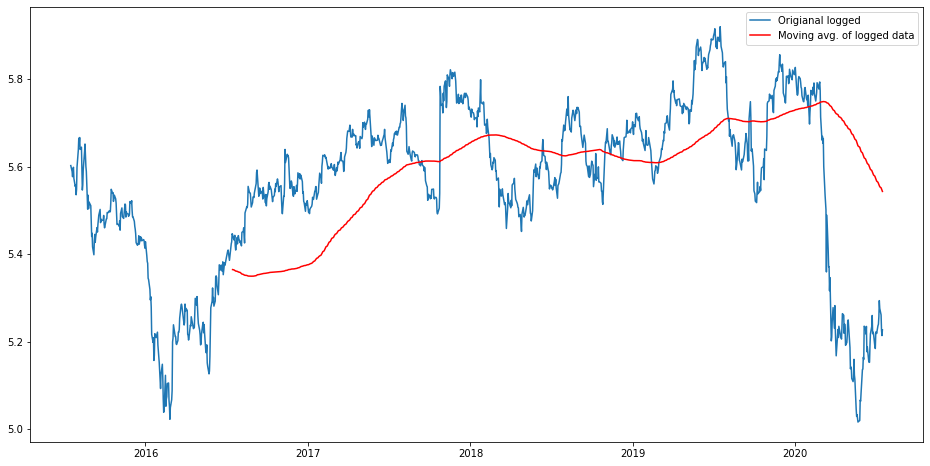

In [10]:
movingAverage = DS_log.rolling(window = 245).mean()

movingSTD = DS_log.rolling(window = 245).std()

plt.plot(DS_log, label = 'Origianal logged')
plt.plot(movingAverage, color = 'red', label = 'Moving avg. of logged data')
#plt.plot(movingSTD, color = 'black', label = 'STD of logged data')
plt.legend(loc= 'best')
plt.show(block = False)

In [11]:
DS_log_minus_MA = DS_log - movingAverage
#datasetLogScaleMinusMovingAverage.head(12)

#Remove NaN values
DS_log_minus_MA.dropna(inplace = True)
DS_log_minus_MA.head(10)

Date
2016-07-15    0.079818
2016-07-18    0.068561
2016-07-19    0.072893
2016-07-20    0.080168
2016-07-21    0.056796
2016-07-22    0.047995
2016-07-25    0.076781
2016-07-26    0.063299
2016-07-27    0.074986
2016-07-28    0.082971
Name: Close, dtype: float64

In [12]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling STD')
    plt.legend(loc = 'best')
    plt.title('Rolling mean and STD')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test
    print('Results of Dickey Fuller test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of observation Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    
    print(dfoutput)

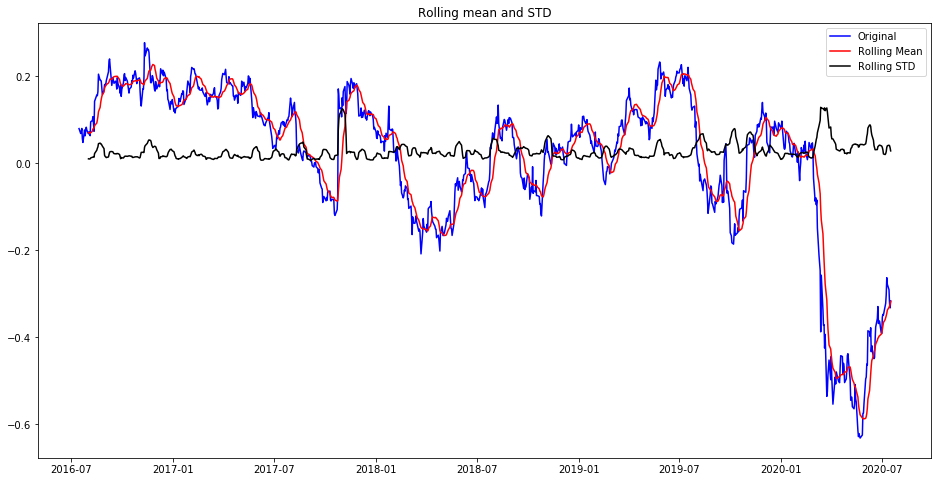

Results of Dickey Fuller test:
Test Statistic                 -2.223749
p-value                         0.197739
#Lags Used                     12.000000
Number of observation Used    971.000000
Critical Value (1%)            -3.437102
Critical Value (5%)            -2.864521
Critical Value (10%)           -2.568357
dtype: float64


In [13]:
test_stationarity(DS_log_minus_MA)

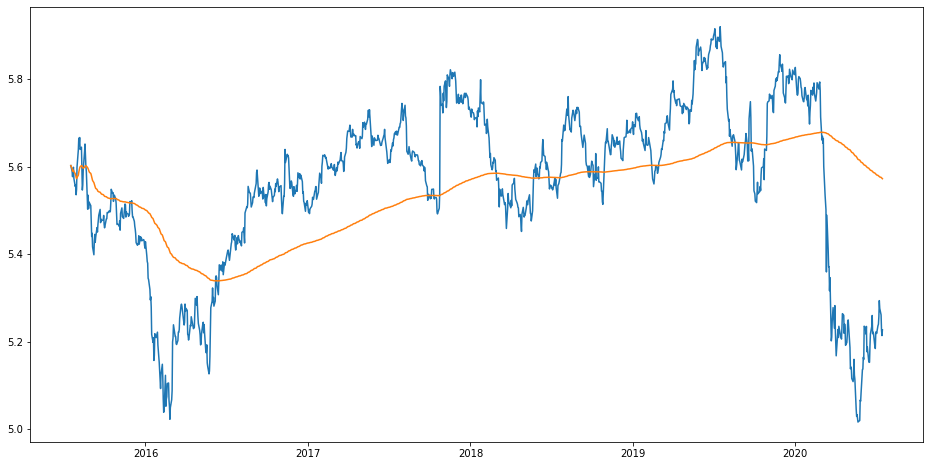

In [14]:
exp_weigh_avg = DS_log.ewm(halflife = 245, min_periods = 0, adjust = True).mean()
plt.plot(DS_log)
plt.plot(exp_weigh_avg)

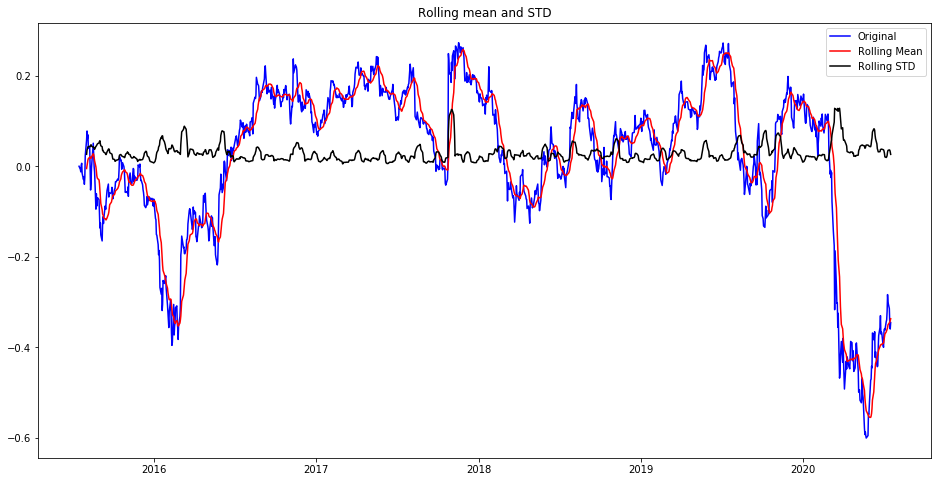

Results of Dickey Fuller test:
Test Statistic                  -2.482612
p-value                          0.119762
#Lags Used                      12.000000
Number of observation Used    1215.000000
Critical Value (1%)             -3.435744
Critical Value (5%)             -2.863922
Critical Value (10%)            -2.568038
dtype: float64


In [15]:
DS_log_minus_exp_avg = DS_log - exp_weigh_avg
test_stationarity(DS_log_minus_exp_avg)

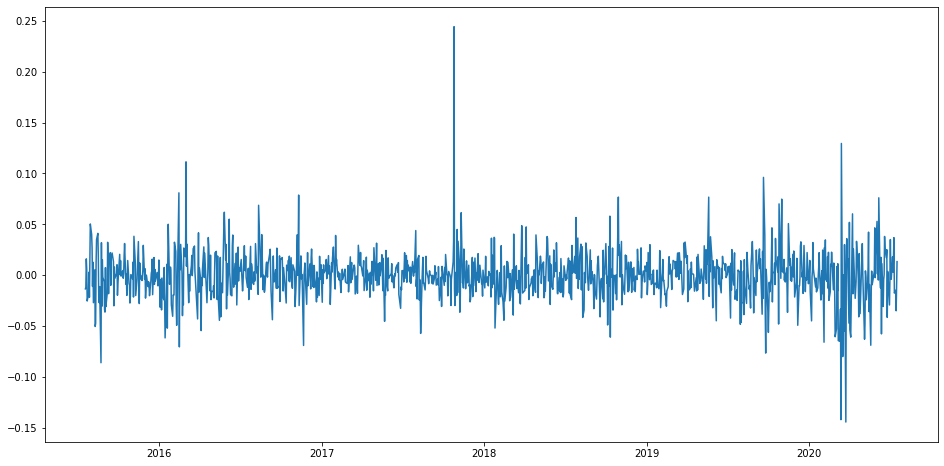

In [16]:
DS_log_shift = DS_log - DS_log.shift()

plt.plot(DS_log_shift)

# here as we have shifted the value by 1, which means that we have differentiated the data once, meaning d = 1 for ARIMA model

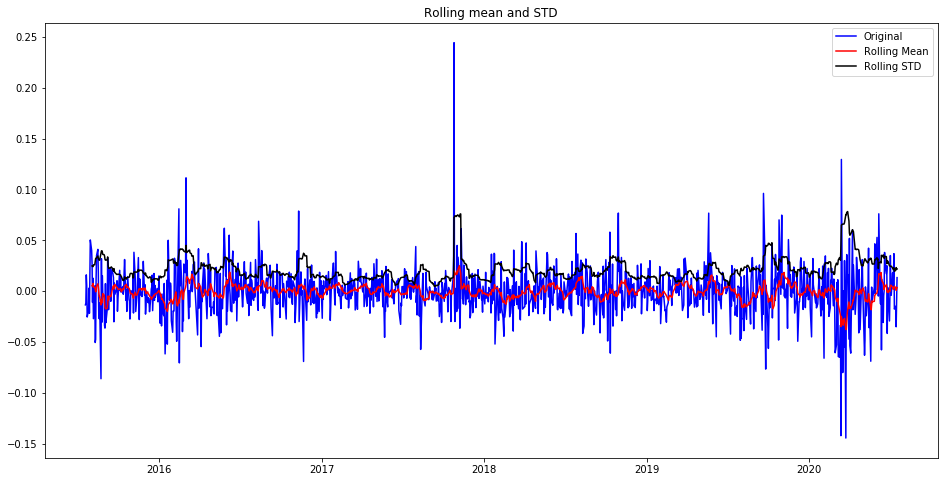

Results of Dickey Fuller test:
Test Statistic               -8.586550e+00
p-value                       7.480355e-14
#Lags Used                    1.100000e+01
Number of observation Used    1.215000e+03
Critical Value (1%)          -3.435744e+00
Critical Value (5%)          -2.863922e+00
Critical Value (10%)         -2.568038e+00
dtype: float64


In [17]:
DS_log_shift.dropna(inplace = True)

test_stationarity(DS_log_shift)

In [18]:
DS_log_df = pd.DataFrame(DS_log)
DS_log_df.index = DS_log.index
DS_log_df.columns = ['Close']
DS_log = DS_log_df

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(DS_log, period = 245)

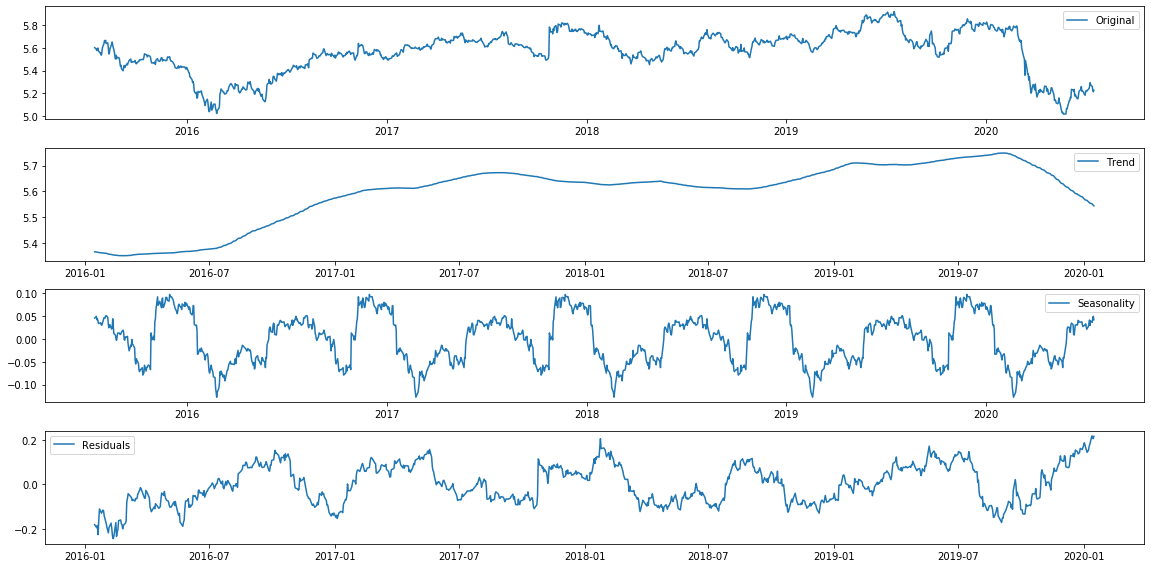

In [20]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(DS_log, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [21]:
decom_log = residual
decom_log.dropna(inplace = True)

decom_log = pd.DataFrame(decom_log)
decom_log.columns = ['Close']

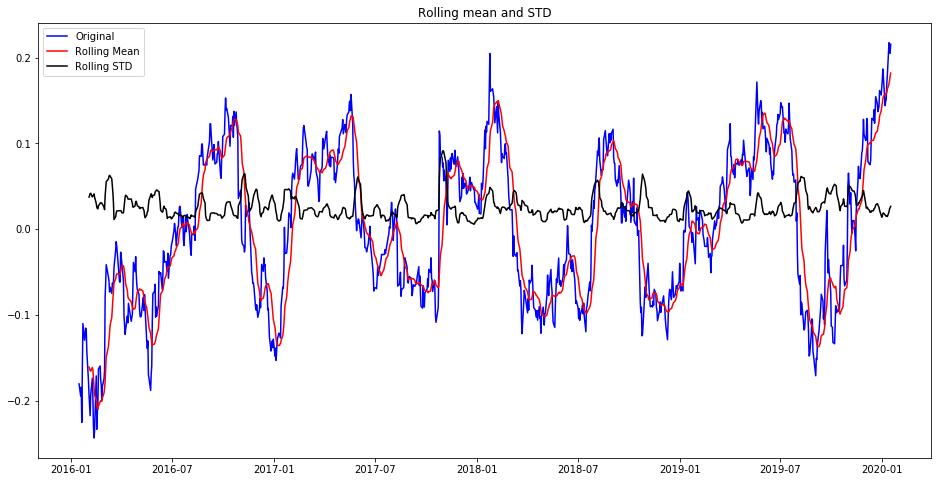

Results of Dickey Fuller test:
Test Statistic                 -3.530658
p-value                         0.007234
#Lags Used                      1.000000
Number of observation Used    982.000000
Critical Value (1%)            -3.437027
Critical Value (5%)            -2.864488
Critical Value (10%)           -2.568340
dtype: float64


In [22]:
test_stationarity(decom_log)

https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Autocorellation function')

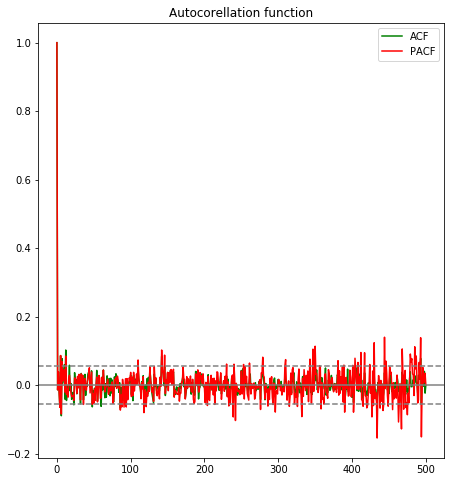

In [23]:
from statsmodels.tsa.stattools import acf,pacf


lag_acf = acf(DS_log_shift, nlags = 500)
lag_pacf = pacf(DS_log_shift, nlags = 500, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf, label = 'ACF', color = 'green') 
plt.plot(lag_pacf, label = 'PACF', color = 'red')
plt.axhline(y = 0, linestyle='-', color='gray')
plt.axhline(y = -1.96/np.sqrt(len(DS_log_shift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(DS_log_shift)), linestyle = '--', color = 'gray')
plt.legend()
plt.title('Autocorellation function')


# #plot PACF
# plt.subplot(122)
# plt.plot(lag_pacf)
# plt.axhline(y = 0, linestyle = '-', color = 'gray')
# plt.axhline(y = -1.96/np.sqrt(len(DS_log_shift)), linestyle = '--', color = 'gray')
# plt.axhline(y = 1.96/np.sqrt(len(DS_log_shift)), linestyle = '--', color = 'gray')
# plt.title('Partially autocorellation function')
# plt.tight_layout()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Autocorellation function')

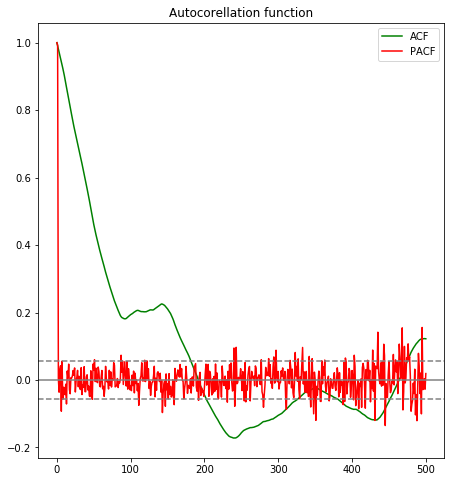

In [24]:
from statsmodels.tsa.stattools import acf,pacf


lag_acf = acf(DS, nlags = 500)
lag_pacf = pacf(DS, nlags = 500, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf, label = 'ACF', color = 'green') 
plt.plot(lag_pacf, label = 'PACF', color = 'red')
plt.axhline(y = 0, linestyle='-', color='gray')
plt.axhline(y = -1.96/np.sqrt(len(DS_log)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(DS_log)), linestyle = '--', color = 'gray')
plt.legend()
plt.title('Autocorellation function')


# #plot PACF
# plt.subplot(122)
# plt.plot(lag_pacf)
# plt.axhline(y = 0, linestyle = '-', color = 'gray')
# plt.axhline(y = -1.96/np.sqrt(len(DS_log_shift)), linestyle = '--', color = 'gray')
# plt.axhline(y = 1.96/np.sqrt(len(DS_log_shift)), linestyle = '--', color = 'gray')
# plt.title('Partially autocorellation function')
# plt.tight_layout()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


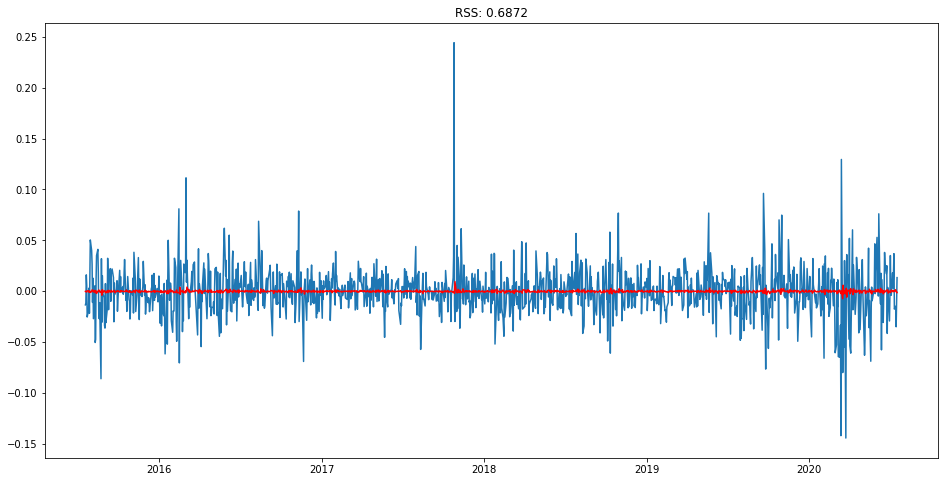

In [25]:
from statsmodels.tsa.arima_model import ARIMA

# AR MODEL
model = ARIMA(DS_log, order = (2,1,0))
results_AR = model.fit(disp = -1)
plt.plot(DS_log_shift)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - DS_log_shift)**2))
print('Plotting AR model')

# RSS = residual sum of squares

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting MA model


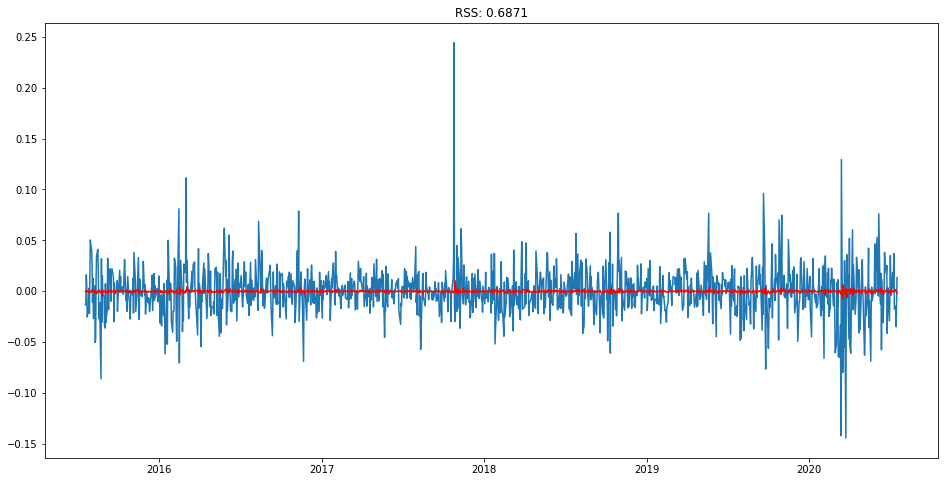

In [26]:
# MA MODEL
model = ARIMA(DS_log, order = (0,1,2))
results_MA = model.fit(disp = -1)
plt.plot(DS_log_shift)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues - DS_log_shift)**2))
print('Plotting MA model')

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA model


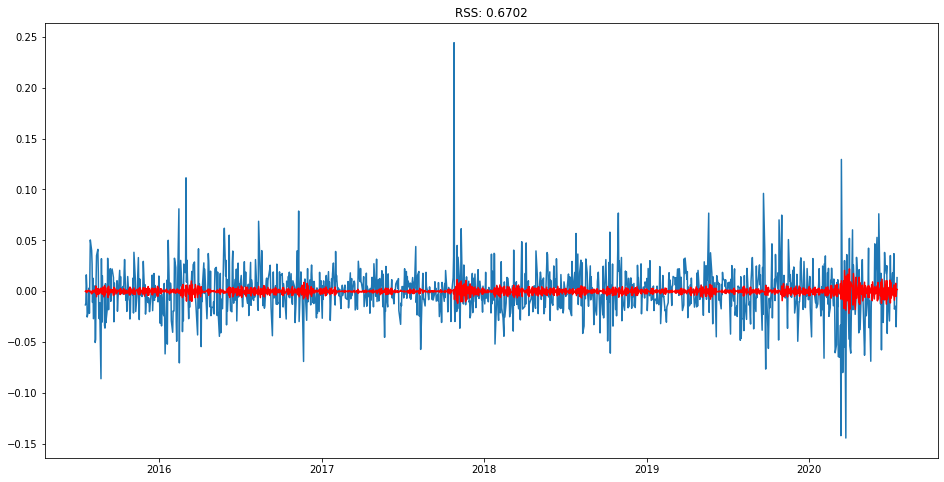

In [27]:
# ARIMA model
model = ARIMA(DS_log, order = (2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(DS_log_shift)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues - DS_log_shift)**2))
print('Plotting ARIMA model')

In [28]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)

print(predictions_ARIMA_diff.head())

Date
2015-07-20   -0.000308
2015-07-21    0.000287
2015-07-22    0.000078
2015-07-23   -0.001464
2015-07-24    0.000007
dtype: float64


In [29]:
# covert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

print(predictions_ARIMA_diff_cumsum.head())

Date
2015-07-20   -0.000308
2015-07-21   -0.000021
2015-07-22    0.000057
2015-07-23   -0.001408
2015-07-24   -0.001401
dtype: float64


In [30]:
predictions_ARIMA_log = pd.Series(DS_log['Close'].iloc[0], index = DS_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

Date
2015-07-17    5.602488
2015-07-20    5.602180
2015-07-21    5.602467
2015-07-22    5.602544
2015-07-23    5.601080
dtype: float64

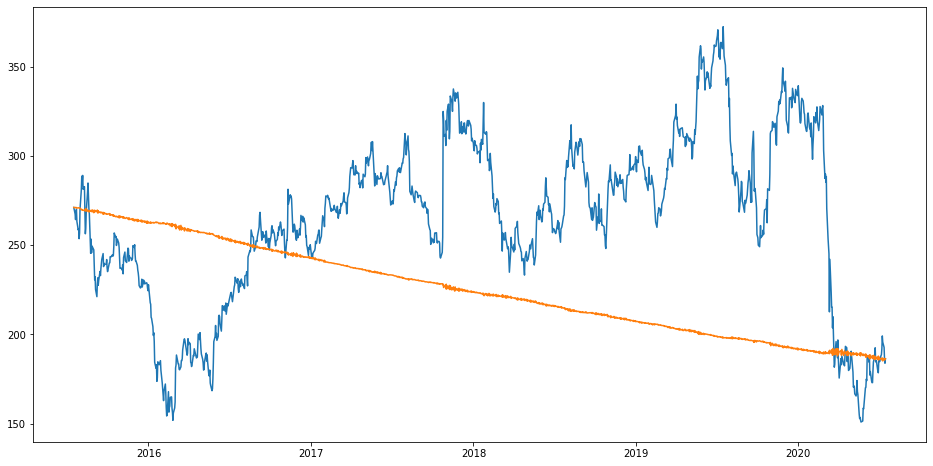

In [31]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(DS)
plt.plot(predictions_ARIMA)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


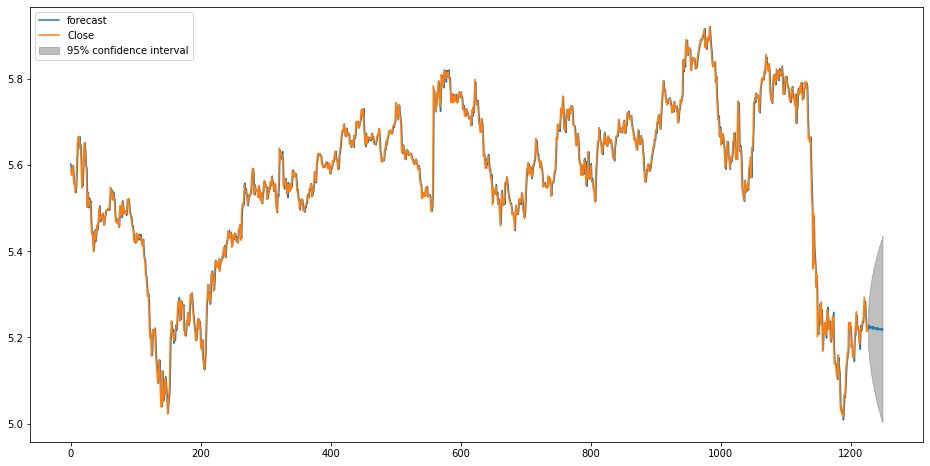

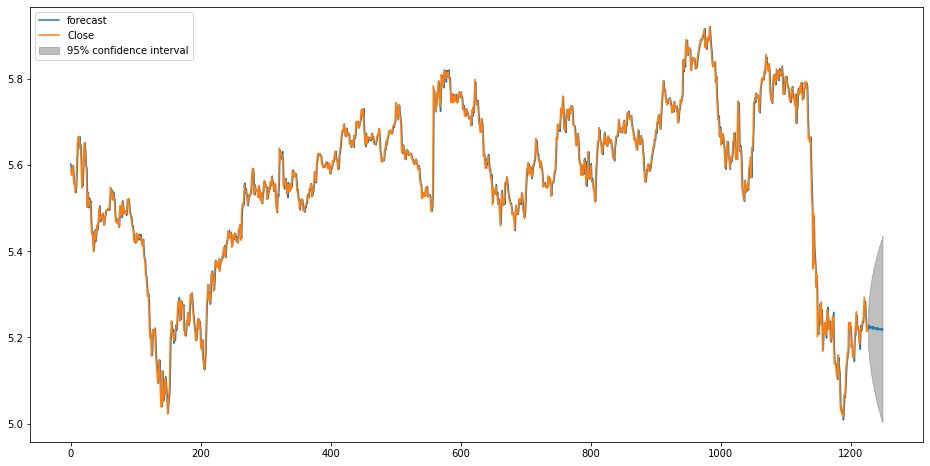

In [32]:
results_ARIMA.plot_predict(1,1250)

In [33]:
next_120 = results_ARIMA.forecast(steps = 120)

# SARIMA model

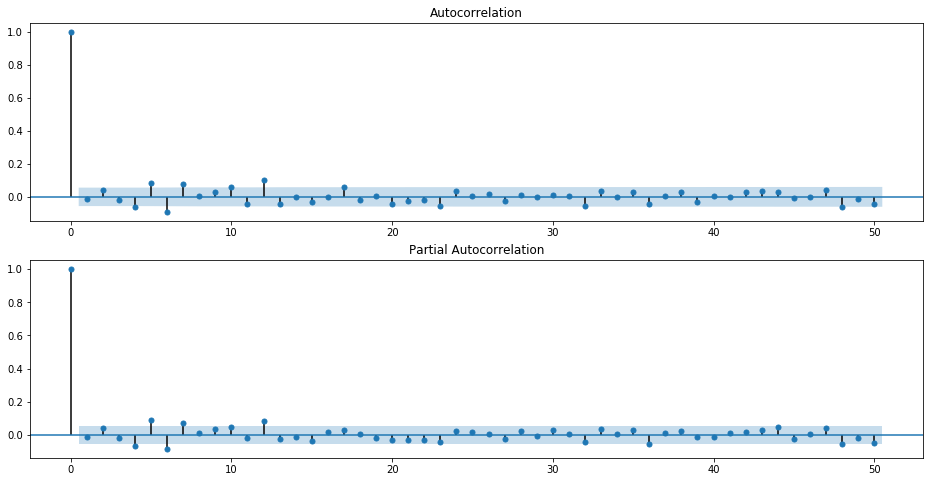

In [34]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(DS_log_shift, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(DS_log_shift, lags=50, ax=ax[1])
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Optimization terminated successfully.
         Current function value: -2.296798
         Iterations: 3
         Function evaluations: 201


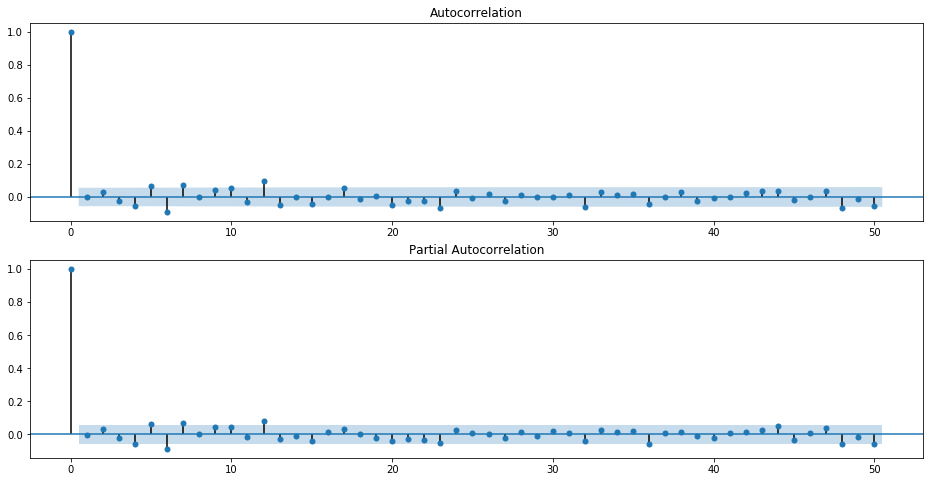

In [35]:
model = sm.tsa.statespace.SARIMAX(DS_log_shift, order=(0,1,1), seasonal_order=(0,1,1,5)).fit(max_iter=50, method='powell')

res = model.resid
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [49]:
sm.tsa.statespace.SARIMAX?

In [54]:
import itertools

#set parameter range
p = range(0,3)
q = range(1,3)
d = range(1,2)
s = range(2,8)

# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))

In [62]:
# SARIMA model pipeline
from tqdm import tqdm
pdq_res = []
sea_pdq_res = []
AIC = []

In [ ]:
# data = entire dataset
# n_test = point where data is split into training and test sets

def walk_forward_validation(data, n_test):
    
    predictions = np.array([])
    mape_list = []
    train, test = data[:n_test], data[n_test:]
    day_list = [7,14,21,28] # weeks 1,2,3,4
    for i in day_list:
        # Fit model to training data
        model = sm.tsa.statespace.SARIMAX(train, order=(1,1,2), 
                                          seasonal_order(1,1,2,7))       
                                         .fit(max_iter = 50,
                                          method = 'powell')
        
        # Forecast daily loads for week i
        forecast = model.get_forecast(steps = 7)
        predictions = np.concatenate(predictions, forecast, 
                                     axis=None)
        # Calculate MAPE and add to mape_list
        j = i-7
        mape_score = (abs(test[j:i]-predictions[j:i])/test[j:i])*100
        mape_mean = mape_score.mean()
        mape_list.append(mape_mean)
        # Add week i to training data for next loop
        train = np.concatenate((train, test[j:i]), axis=None)
return predictions, mape_list